Name: Joshua Lindsey

Date: 2025/05/18

Project Name: Zillow Home Value (Zestimate) Prediction in ML

Source: https://www.geeksforgeeks.org/zillow-home-value-zestimate-prediction-in-ml/#

In [29]:
# Step 1: Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Step 2: Load Data

df = pd.read_csv('Zillow.csv')
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,target
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410
4,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940


In [10]:
df.shape

(77613, 59)

In [11]:
# Step 3: Data Cleaning

to_remove = []

for col in df.columns:
    # Removing columns having only one value.
    if df[col].nunique() == 1:
        to_remove.append(col)
    # Removing columns with more than 90% of the rows as null values
    elif (df[col].isnull()).mean() > 0.60:
        to_remove.append(col)

print(len(to_remove))

30


In [12]:
# So there are 30 columns that contain either unique values equal to 1 or have around 60% of the rows as null values

df.drop(to_remove, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   bathroomcnt                   77579 non-null  float64
 2   bedroomcnt                    77579 non-null  float64
 3   buildingqualitytypeid         49809 non-null  float64
 4   calculatedbathnbr             76963 non-null  float64
 5   calculatedfinishedsquarefeet  77378 non-null  float64
 6   finishedsquarefeet12          73923 non-null  float64
 7   fips                          77579 non-null  float64
 8   fullbathcnt                   76963 non-null  float64
 9   heatingorsystemtypeid         49571 non-null  float64
 10  latitude                      77579 non-null  float64
 11  longitude                     77579 non-null  float64
 12  lotsizesquarefeet             69321 non-null  float64
 13  p

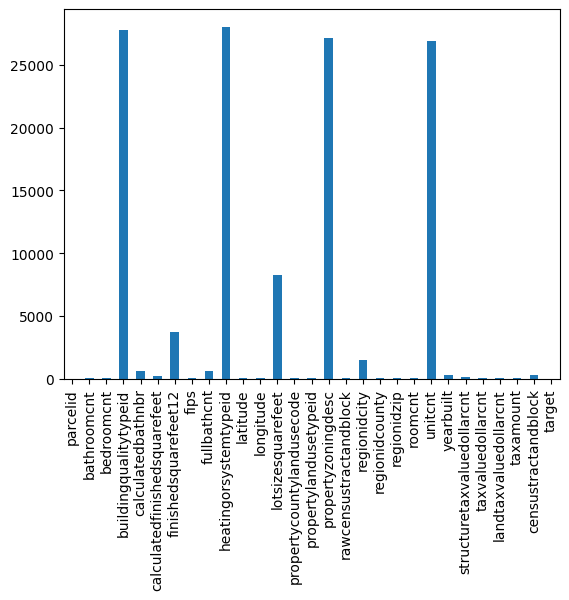

In [13]:
# We see that there are still null values in different columns of the dataset. So let's check for the null values in the data frame and impute them by using the mean value for the 
# confinuous variables and the mode value for the categorical columns.

df.isnull().sum().plot.bar()
plt.show()

In [14]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype == np.number:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

In [15]:
# Step 4: Exploratory Data Analysis

ints, objects, floats = [], [], []

for col in df.columns:
    if df[col].dtype == float:
        floats.append(col)
    elif df[col].dtype == int:
        ints.append(col)
    else:
        objects.append(col)

len(ints), len(floats), len(objects)


(0, 26, 3)

In [16]:
for col in objects:
    print(col, ' -> ', df[col].nunique())
    print(df[col].unique())
    print()

parcelid  ->  77414
[14297519 17052889 14186244 ... 17239384 12773139 12826780]

propertycountylandusecode  ->  75
['122' '1110' '0101' '010C' '1129' '0100' '38' '34' '1111' '012C' '010V'
 '1' '0103' '010D' '0200' '010E' '0300' '96' '0104' '0400' '01DC' '01HC'
 '1321' '1410' '0108' '1128' '010G' '1720' '010H' '1210' '0102' '010F'
 '010M' '1117' '0201' '0700' '1722' '73' '0109' '0301' '01HE' '135' '0204'
 '0401' '070D' '0113' '0133' '0131' '1432' '040G' '1112' '1222' '1310'
 '1120' '0111' '1116' '1421' '0110' '0105' '012E' '0141' '1333' '0115'
 '040V' '010L' '040B' '012D' '0114' '0203' '030G' '0130' '105' '020G'
 '020M' '020E']

propertyzoningdesc  ->  1907
['LAR1' 'LCR110000*' 'LAR3' ... 'HAR4-R2*' 'LCR1VV' 'BFA15000*']



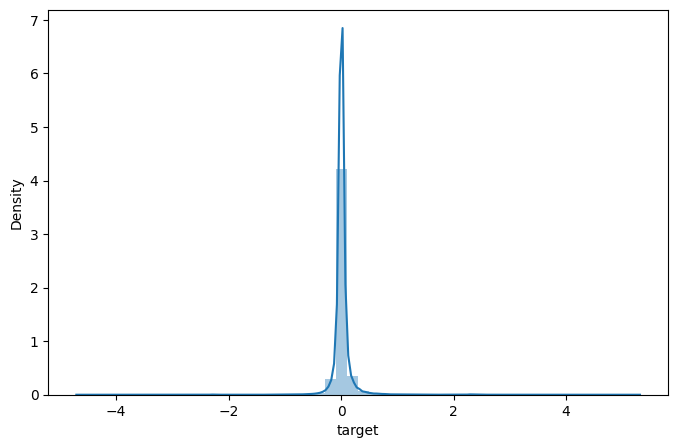

In [18]:
plt.figure(figsize=(8,5))
sns.distplot(df['target'])
plt.show()

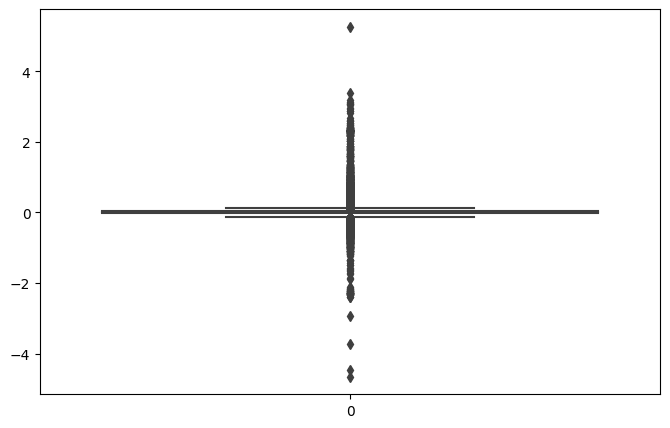

In [19]:
# From the distribution plot of the target varaible, it seems like there are outliers in the data. Let's use a boxplot to detect them

plt.figure(figsize=(8,5))
sns.boxplot(df['target'])
plt.show()

In [21]:
# From the above plot, we can clip the target values between -1 and 1 for feasible (only on patterns) training the model.

print('Shape of the dataframe before removal of outliers', df.shape)
df = df[(df['target'] > -1) & (df['target'] < 1)]
print('Shape of the dataframe after removal of outliers', df.shape)

Shape of the dataframe before removal of outliers (77613, 29)
Shape of the dataframe after removal of outliers (77261, 29)


In [22]:
# This means that we don't lose that many points

for col in objects:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

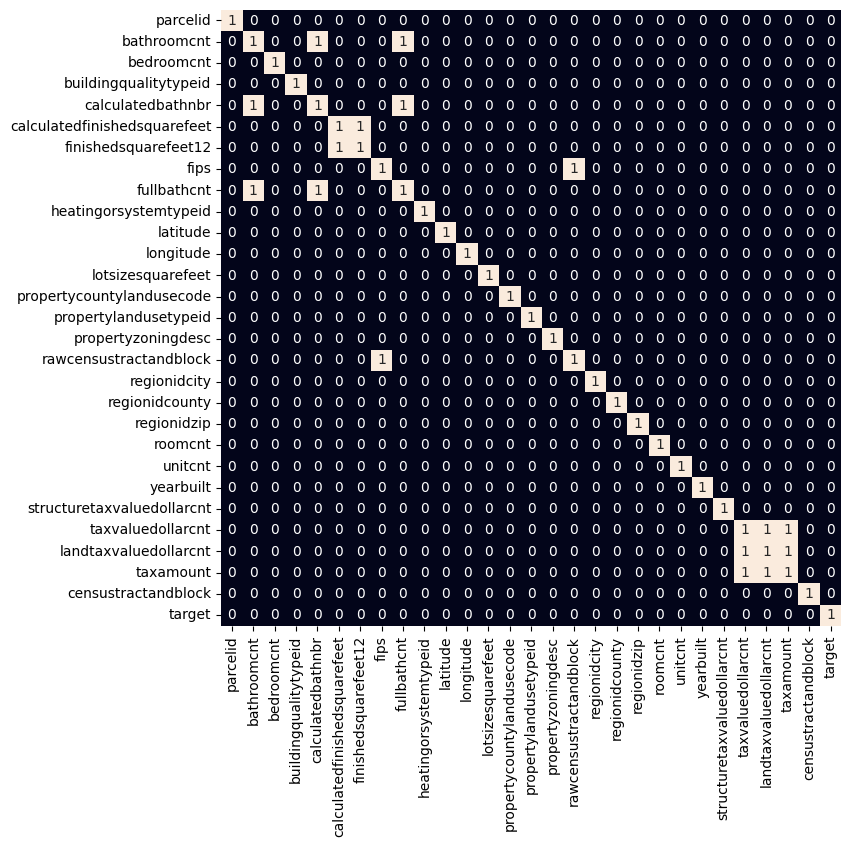

In [25]:
# Check whether there are any highly correlated features in our dataset or not

plt.figure(figsize=(8,8))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [ ]:
# There are some highly correlated features in the feature space. We will remove them to decrease the complexity of the data and avoid any cases of error

to_remove = ['calculatedbathnbr','fullbathcnt','fips','rawcensustractandblock',
             'taxvaluedollarcnt','finishedsquarefeet12','landtaxvaluedollarcnt']

df.drop(to_remove, axis = 1, inplace=True)

In [27]:
# Step 5: Model Training

features = df.drop(['parcelid'], axis=1)
target = df['target'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=22)

x_train.shape, x_test.shape

((69534, 21), (7727, 21))

In [28]:
# Normalizing the features before feeding it into machine learning models helps us to acheive stable and fast training.

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
# We have split our data into training and test data also the normalization of the data has been done. Now let's train some state of the art machine learning models
# and select the best out of them using validation dataset

models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(x_train, y_train)
    print('{} : '.format(models[i]))

    train_preds = models[i].predict(x_train)
    print('Training Error: {}'.format(mae(y_train, train_preds)))

    val_preds = models[i].predict(x_test)
    print('Testing Error: {}'.format(mae(y_test, val_preds)))
    print()



LinearRegression() : 
Training Error: 9.295349470435582e-17
Testing Error: 9.1234195155332e-17

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error: 0.0011615510279198217
Testing Error: 0.0020190995111265897

Lasso() : 
Training Error: 0.06232063320274573
Testing Error: 0.06168432579